In [1]:
import cv2
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

In [24]:
glasses=cv2.imread('train/glasses.png',cv2.IMREAD_UNCHANGED)
cat_eye=cv2.imread('train/cat_eye.png',cv2.IMREAD_UNCHANGED)
sunglass=cv2.imread('train/sunglasses_PNG95.png',cv2.IMREAD_UNCHANGED)
mustache=cv2.imread('train/mustache.png',cv2.IMREAD_UNCHANGED)
print(sunglass.shape)
print(cat_eye.shape)
print(glasses.shape)
print(mustache.shape)

(1536, 2048, 4)
(540, 1447, 4)
(221, 483, 4)
(320, 640, 4)


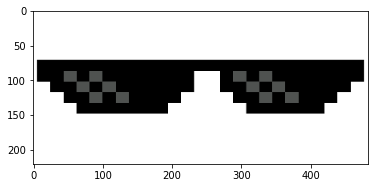

In [3]:
plt.imshow(glasses)
plt.show()

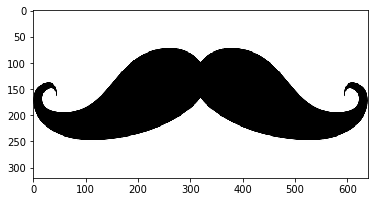

In [4]:
plt.imshow(mustache)
#plt.axis('OFF')
plt.show()

In [5]:
eye_cascade=cv2.CascadeClassifier('train/third-party/frontalEyes35x16.xml')
nose_cascade=cv2.CascadeClassifier('train/third-party/Nose18x15.xml')

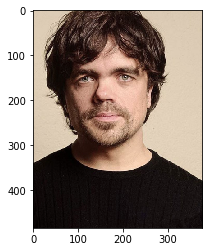

(485, 377, 4)


In [11]:
test=cv2.imread('test/Before.png',-1)
test=cv2.cvtColor(test,cv2.COLOR_BGR2RGBA)
plt.imshow(test)
plt.show()
print(test.shape)

In [7]:
#detect eyes and nose
eye=eye_cascade.detectMultiScale(test,1.4)
print(eye)

[[ 68 108  86 188]]


In [8]:
nose=nose_cascade.detectMultiScale(test,1.6)
print(nose)

[[130 173  38  46]
 [118 162  61  74]]


In [9]:
for x,y,w,h in eye:            #forming a rectangle
    cv2.rectangle(test,(x,y),(x+h,y+w),(0,0,255),2)
for x1,y1,w1,h1 in nose:
    cv2.rectangle(test,(x1,y1),(x1+h1,y1+w1),(255,0,0),2)

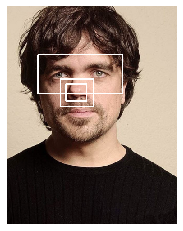

In [10]:
plt.imshow(test)
plt.axis('Off')
plt.show()

# FINAL CODE

In [55]:
def detect_eyes_nose(img,eye_cascade,nose_cascade):
    eyes=eye_cascade.detectMultiScale(img,1.4)
    nose=nose_cascade.detectMultiScale(img,1.6)
    print(eyes)
    print(nose)
    #for ex,ey,ew,eh in eyes:
        #cv2.rectangle(img,(ex,ey),(ex+eh,ey+ew),(0,0,255),2)
    #for nx,ny,nw,nh in nose:
        #cv2.rectangle(img,(nx,ny),(nx+nh,ny+nw),(255,0,0),2)
    return eyes,nose

def put_glasses(img,glasses,x,y,w,h):
    resize_g=cv2.resize(glasses,(h,w))
    for i in range(resize_g.shape[0]):
        for j in range(resize_g.shape[1]):
            if resize_g[i][j][3]!=0:
                img[y+i,x+j]=resize_g[i][j]
    return img

def put_mustache(img,mustache,x,y,w,h):
    resize_mustache=cv2.resize(mustache,(h,w))
    a,b,c=resize_mustache.shape
    for i in range(a):
        for j in range(b):
            if resize_mustache[i][j][3]!=0:
                img[y+i+25,x+j+5]=resize_mustache[i][j]
    return img

def Snapchatfilter(img,eye_cascade,nose_cascade,glasses,mustache):
    eye,nose=detect_eyes_nose(img,eye_cascade,nose_cascade)
    ex,ey,ew,eh=eye[0]
    new_img=put_glasses(img,glasses,ex,ey,ew,eh)
    nx,ny,nw,nh=nose[0]
    final_img=put_mustache(new_img,mustache,nx,ny,nw,nh)
    return new_img
    

# testing the algo

[[ 68 108  86 188]]
[[130 173  38  46]
 [118 162  61  74]]


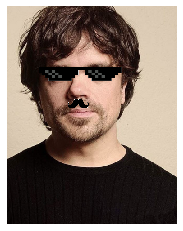

In [13]:
edited=Snapchatfilter(test,eye_cascade,nose_cascade,glasses,mustache)
plt.imshow(edited)
plt.axis('OFF')
plt.show()

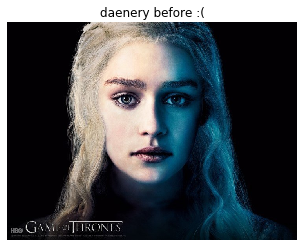

In [65]:
test1=cv2.imread('test/daenerystargaryen.jpg')
test1=cv2.cvtColor(test1,cv2.COLOR_BGR2RGBA)
plt.imshow(test1)
plt.axis('OFF')
plt.title('daenery before :(')
plt.show()

[[230 127 120 264]]
[[334 244  61  74]
 [311 228  98 118]]


(-0.5, 739.5, 554.5, -0.5)

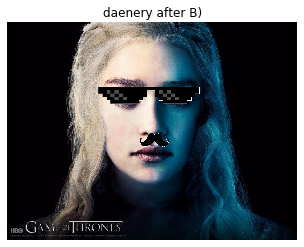

In [66]:
after=Snapchatfilter(test1,eye_cascade,nose_cascade,glasses,mustache)
plt.imshow(after)
plt.title('daenery after B)')
plt.axis('OFF')

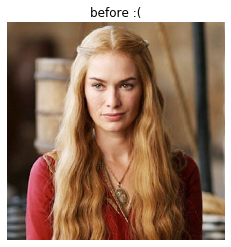

In [67]:
test2=cv2.imread('test/cuQ5M1mN.jpeg')
test2=cv2.cvtColor(test2,cv2.COLOR_BGR2RGBA)
plt.imshow(test2)
plt.title('before :(')
plt.axis('off')
plt.show()

[[241 160  61 134]]
[[285 223  61  74]]


(-0.5, 661.5, 661.5, -0.5)

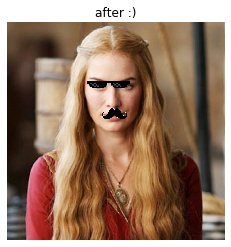

In [68]:
after2=Snapchatfilter(test2,eye_cascade,nose_cascade,glasses,mustache)
plt.imshow(after2)
plt.title('after :)')
plt.axis('off')

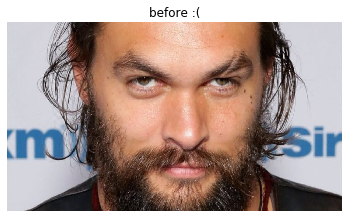

In [69]:
test3=cv2.imread('test/maxresdefault.jpg')
test3=cv2.cvtColor(test3,cv2.COLOR_BGR2RGBA)
plt.imshow(test3)
plt.title('before :(')
plt.axis('off')
plt.show()

[[419 133 236 517]]
[[589 359 157 189]
 [700 409 157 189]
 [518 308 252 302]]


(-0.5, 1279.5, 719.5, -0.5)

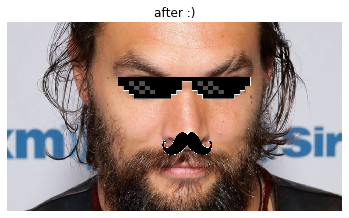

In [70]:
after3=Snapchatfilter(test3,eye_cascade,nose_cascade,glasses,mustache)
plt.imshow(after3)
plt.title('after :)')
plt.axis('off')

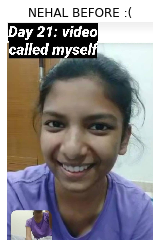

In [45]:
nehal_b=cv2.imread('nehal.jpeg')
nehal_b=cv2.cvtColor(nehal_b,cv2.COLOR_BGR2RGBA)
plt.imshow(nehal_b)
plt.axis('off')
plt.title('NEHAL BEFORE :(')
plt.show()

[[228 629 236 517]
 [131 576 331 723]]
[[325 826 252 302]]


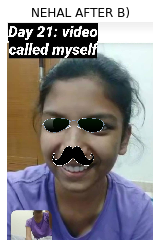

In [46]:
nehal_after=Snapchatfilter(nehal_b,eye_cascade,nose_cascade,sunglass,mustache)
plt.imshow(nehal_after)
plt.axis('off')
plt.title('NEHAL AFTER B)')
plt.show()

# CREATING CSV

In [30]:
rgb=cv2.cvtColor(edited,cv2.COLOR_RGBA2RGB).reshape((-1,3))

In [31]:
r=rgb[:,0]
g=rgb[:,1]
b=rgb[:,2]

In [32]:
r

array([219, 220, 219, ...,  19,  21,  22], dtype=uint8)

In [33]:
g

array([202, 203, 202, ...,  13,  15,  15], dtype=uint8)

In [34]:
b

array([180, 181, 180, ...,  13,  15,  15], dtype=uint8)

In [35]:
test_data=list(zip(b,g,r))

In [36]:
df=pd.DataFrame(test_data,columns=['Channel 1','Channel 2','Channel 3'])

In [37]:
df.to_csv('solutions.csv',index=False)